In [1]:
import numpy as np
import json
from pathlib import Path
import shutil
from collections import defaultdict

In [8]:
base_dir = Path("./")
histogram = defaultdict(lambda: defaultdict(lambda: 0))
for scenario_dir in base_dir.iterdir():
    if not scenario_dir.is_dir() or "scenario" not in scenario_dir.name:
        continue
    # print(scenario_dir.as_posix())
    scenario_name = scenario_dir.name
    for data_file in scenario_dir.glob("onlyq_*.json"):
        tr_or_ts = data_file.name.split("_")[1].split(".")[0]
        repr = f"{scenario_name}_{tr_or_ts}"
        repr = tr_or_ts
        # histogram[repr] = defaultdict(lambda: 0)
        with open(data_file, "r", encoding="utf-8") as f:
            datas = json.load(f)
            for data in datas:
                input = data["Input"]
                tags = data["Tags"]
                styles, returns = tags["Style"], tags["Returns"]
                # print(input, style)
                for style in styles:
                    histogram[repr][style] += 1


scenario1
scenario2


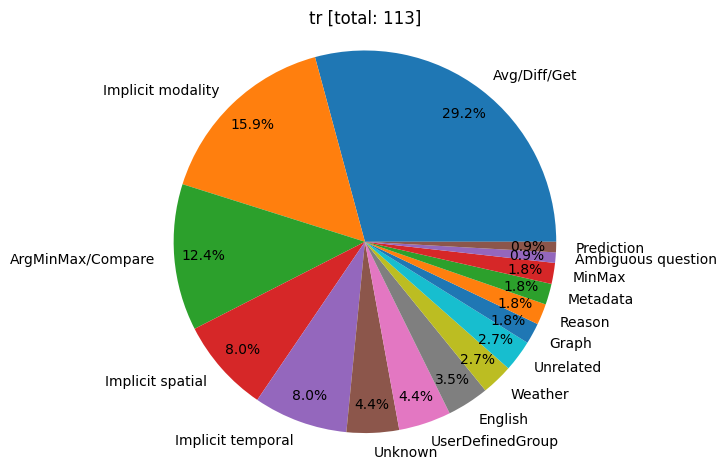

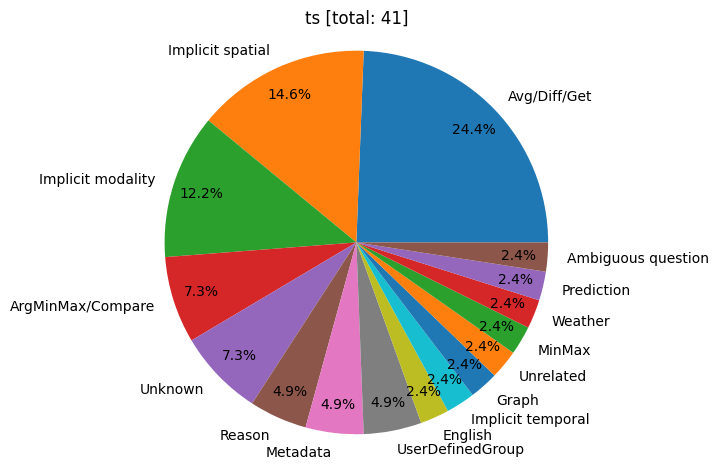

In [9]:
import matplotlib.pyplot as plt

# pie chart
# sort by number of styles

for repr, hist in histogram.items():
    hist = dict(sorted(hist.items(), key=lambda x: x[1], reverse=True))
    labels = hist.keys()
    sizes = hist.values()
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, 
    autopct='%1.1f%%', startangle=0, 
        pctdistance=0.85, labeldistance=1.1)
    ax1.axis('equal')
    plt.title(f"{repr} [total: {sum(sizes)}]")
    plt.tight_layout()
    plt.show()
    plt.close()